In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

First I Upload the dataset and check for missing values.

In [101]:
customers=pd.read_excel('..\Data\\raw\creditcardmarketing.xlsx')
customers.isna()


,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


secondly, I drop any customer ID column, and standardize the column names, dropping rows with missing values in average balance, as this will most likely covers NaN in other columns

In [5]:
customers.drop('Customer Number',axis=1,inplace=True)
cols_std=[i.replace(' ','_').lower() for i in customers.columns]
customers.rename(columns=dict(zip(customers.columns,cols_std)),inplace=True)
customers.drop(customers[customers['average_balance'].isna()].index,axis=0,inplace=True)

In [6]:
customers.isna().sum() 

offer_accepted          0
reward                  0
mailer_type             0
income_level            0
#_bank_accounts_open    0
overdraft_protection    0
credit_rating           0
#_credit_cards_held     0
#_homes_owned           0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

I need t make sure it the dta types are correct

In [18]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17974 entries, 0 to 17999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        17974 non-null  object 
 1   reward                17974 non-null  object 
 2   mailer_type           17974 non-null  object 
 3   income_level          17974 non-null  object 
 4   #_bank_accounts_open  17974 non-null  int64  
 5   overdraft_protection  17974 non-null  object 
 6   credit_rating         17974 non-null  object 
 7   #_credit_cards_held   17974 non-null  int64  
 8   #_homes_owned         17974 non-null  int64  
 9   household_size        17974 non-null  int64  
 10  own_your_home         17974 non-null  object 
 11  average_balance       17974 non-null  float64
 12  q1_balance            17974 non-null  float64
 13  q2_balance            17974 non-null  float64
 14  q3_balance            17974 non-null  float64
 15  q4_balance         

My target will be whether the offer is accepted or not, to be able to predict whether a client will accept the offer if a model is built

In [7]:
y=customers['offer_accepted']
X=customers.drop('offer_accepted',axis=1)
cols_std.remove(y.name)

I will create this functions file to call in the future in case necessary.
 

In [ ]:
%%writefile functions.py
import pandas as pd
import numpy as np
    
def pctbygroup(df,y):
    '''this function will provide a dictionary of dataframes with the percentage of frequency of values of column if less than 10 y aggregated by each column that corrresponds to the key of the dictionary'''
    cols=[c for c in df.columns if c!=y]
    dfs={}
    for i in cols:
        dfs[i]=df.groupby(i)[y].value_counts().to_frame().div(df.groupby(i).agg('count')[y].to_frame(),level=i).rename(columns={y:'%'}).sort_values('%')*100
    return dfs
    
def countbygroup(df,y):
    '''this function will provide a dictionary of dataframes  of value counts of column 'y' aggregated by each of the other columns, being that each key will correspond to the column used to aggregate by'''
    cols=[c for c in df.columns if c!=y]
    pds={}
    for i in cols:
        pds[i]=df.groupby(i)[y].value_counts()     
    return pds





Overwriting functions.py


In [8]:
import functions


As the columns are mostly categorical, I will check the distribution of Yes vs no 'offer_accepted'  for each category.

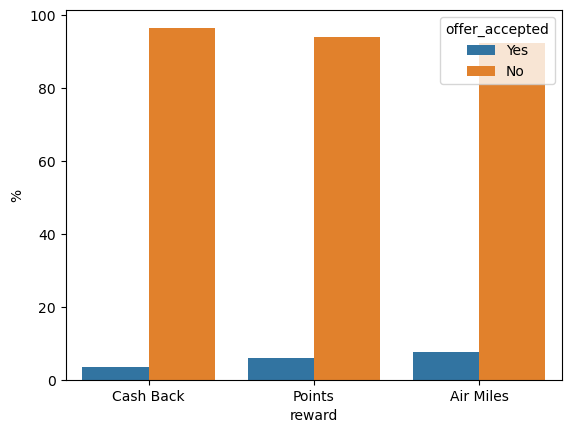

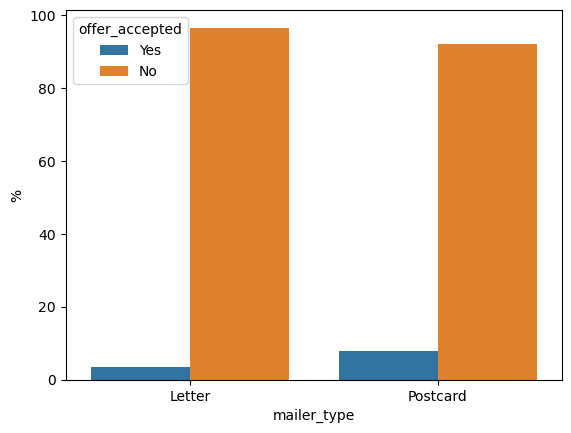

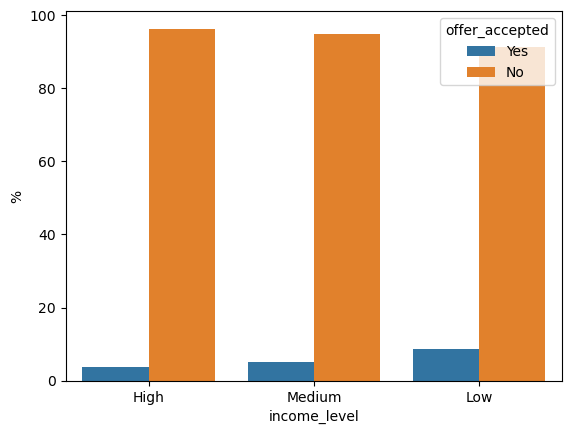

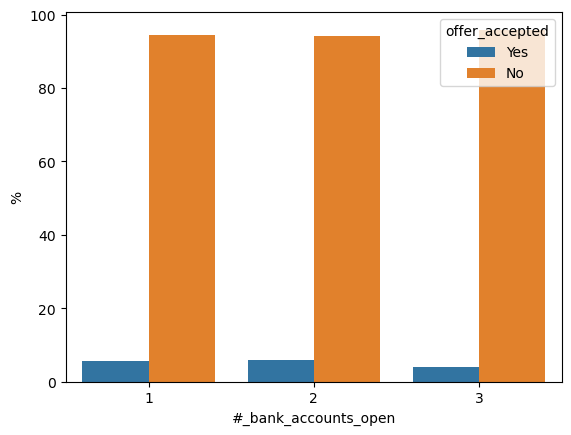

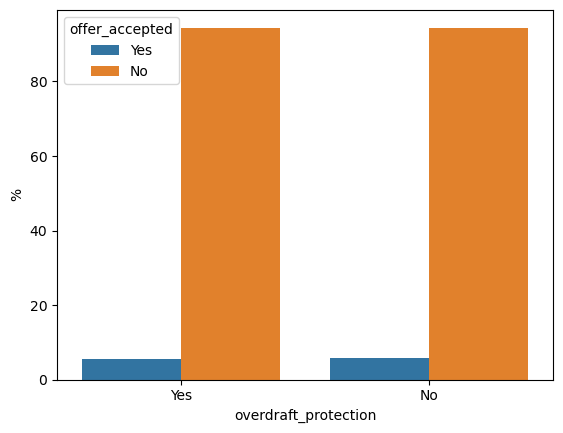

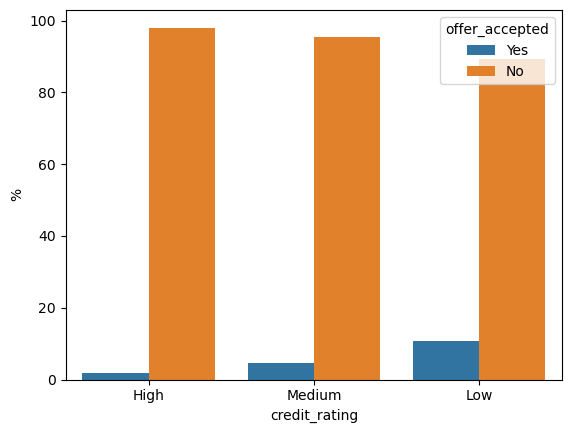

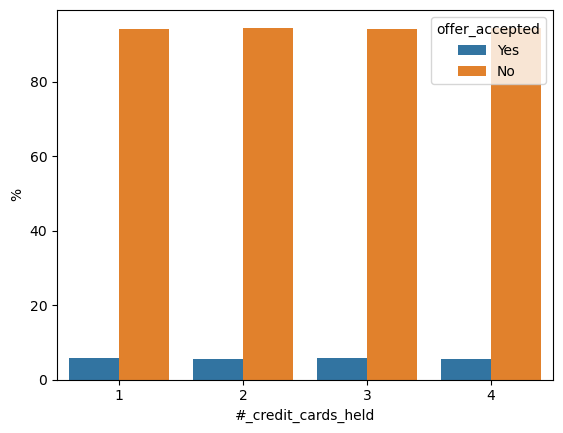

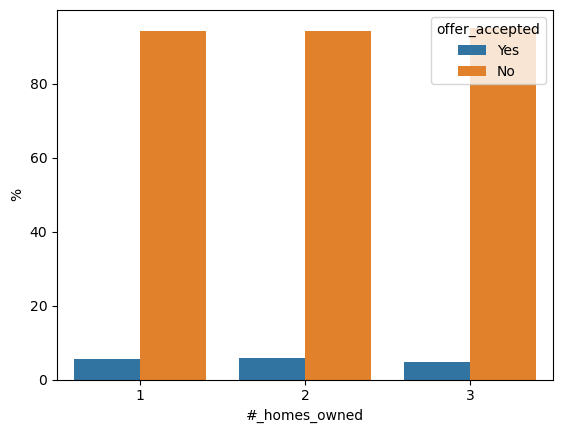

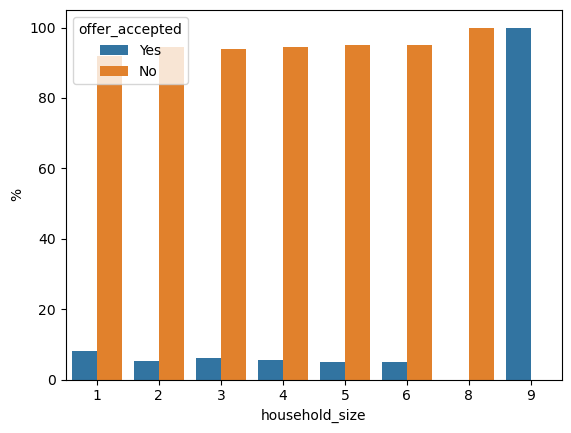

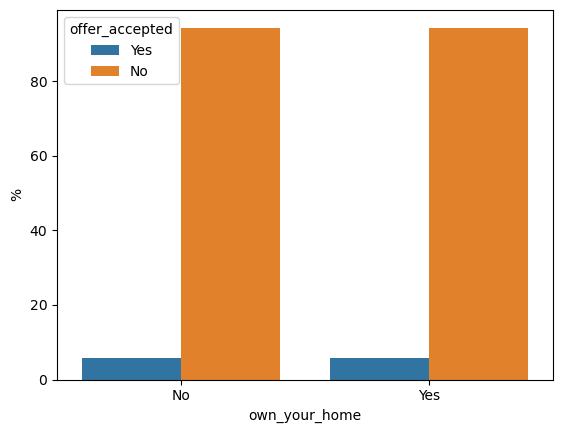

In [ ]:
for key,df in functions.pctbygroup(customers,'offer_accepted').items():
    if customers[key].nunique()<10:
        sns.barplot(data=df.reset_index(), x=df.reset_index()[key],y='%',hue='offer_accepted')
        plt.show()

Having seen the distribution between yes and no, I am curious about household size 8 and 9.

In [ ]:
for i in functions.countbygroup(customers,'offer_accepted').values():
    display(i.to_frame())

offer_accepted
reward    offer_accepted                
Air Miles No                        5584
          Yes                        463
Cash Back No                        5789
          Yes                        206
Points    No                        5582
          Yes                        352

offer_accepted
mailer_type offer_accepted                
Letter      No                        8542
            Yes                        300
Postcard    No                        8413
            Yes                        721

offer_accepted
income_level offer_accepted                
High         No                        4354
             Yes                        165
Low          No                        4068
             Yes                        387
Medium       No                        8533
             Yes                        469

offer_accepted
#_bank_accounts_open offer_accepted                
1                    No                       12899
                     Yes                        775
2                    No                        3773
                     Yes                        234
3                    No                         283
                     Yes                         12

offer_accepted
overdraft_protection offer_accepted                
No                   No                       14427
                     Yes                        873
Yes                  No                        2528
                     Yes                        148

offer_accepted
credit_rating offer_accepted                
High          No                        5945
              Yes                        119
Low           No                        5315
              Yes                        633
Medium        No                        5695
              Yes                        269

offer_accepted
#_credit_cards_held offer_accepted                
1                   No                        5786
                    Yes                        361
2                   No                        7500
                    Yes                        433
3                   No                        3183
                    Yes                        198
4                   No                         486
                    Yes                         29

offer_accepted
#_homes_owned offer_accepted                
1             No                       13679
              Yes                        823
2             No                        3100
              Yes                        189
3             No                         176
              Yes                          9

offer_accepted
household_size offer_accepted                
1              No                         496
               Yes                         43
2              No                        2658
               Yes                        151
3              No                        5361
               Yes                        344
4              No                        5222
               Yes                        310
5              No                        2706
               Yes                        145
6              No                         511
               Yes                         27
8              No                           1
9              Yes                          1

offer_accepted
own_your_home offer_accepted                
No            No                        5980
              Yes                        360
Yes           No                       10975
              Yes                        661

,,offer_accepted
average_balance,offer_accepted,
48.25,No,1
56.00,No,1
62.00,No,1
63.50,No,1
71.25,No,1
...,...,...
2437.50,No,1
2609.50,No,1
2738.50,No,1


offer_accepted
q1_balance offer_accepted                
0.0        No                           5
1.0        No                          10
2.0        No                           9
           Yes                          1
3.0        No                           3
...                                   ...
2435.0     No                           1
2453.0     No                           1
2502.0     No                           1
2509.0     No                           1
3450.0     No                           1

[2944 rows x 1 columns]

,,offer_accepted
q2_balance,offer_accepted,
0.0,No,1
1.0,No,3
2.0,No,10
3.0,No,5
4.0,No,5
...,...,...
2445.0,No,1
2918.0,No,1
3214.0,No,1


,,offer_accepted
q3_balance,offer_accepted,
0.0,No,1
1.0,No,5
2.0,No,3
3.0,No,6
4.0,No,9
...,...,...
2761.0,No,1
2802.0,No,1
2945.0,No,1


,,offer_accepted
q4_balance,offer_accepted,
0.0,No,5
1.0,No,2
2.0,No,8
3.0,No,3
4.0,No,11
...,...,...
3178.0,No,1
3191.0,No,1
3201.0,No,1


as there are only 2 households with more than 6 out of almost 18K, I will remove these outliers.

In [9]:
customers=customers[customers['household_size']<7]

Here I calculate percentages this time removing continuous values and filtering only by those that accepted the offer, and defining a data dictionary for the categories more prone to accept

In [77]:
count=functions.countbygroup(customers,'offer_accepted')
pct=functions.pctbygroup(customers,'offer_accepted')
most_prone_to_accept={}
least_prone_to_accept={}
for i in pct.keys():
    if customers[i].nunique()<10:
        conc=pd.concat([pct[i],count[i]],axis=1).rename(columns={'offer_accepted':'count'}).reset_index()
        display(conc[conc['offer_accepted']=='Yes'])
        most_prone_to_accept[conc[conc['offer_accepted']=='Yes'].iloc[0].index[0]]=conc[conc['offer_accepted']=='Yes'].iloc[-1,0]
        least_prone_to_accept[conc[conc['offer_accepted']=='Yes'].iloc[-1].index[0]]=conc[conc['offer_accepted']=='Yes'].iloc[0,0]



,reward,offer_accepted,%,count
0,Cash Back,Yes,3.436197,206
1,Points,Yes,5.916063,351
2,Air Miles,Yes,7.657956,463


,mailer_type,offer_accepted,%,count
0,Letter,Yes,3.392898,300
1,Postcard,Yes,7.884363,720


,income_level,offer_accepted,%,count
0,High,Yes,3.630728,164
1,Medium,Yes,5.209953,469
2,Low,Yes,8.686869,387


,#_bank_accounts_open,offer_accepted,%,count
0,3,Yes,4.067797,12
1,1,Yes,5.661205,774
2,2,Yes,5.839780,234


,overdraft_protection,offer_accepted,%,count
0,Yes,Yes,5.495327,147
1,No,Yes,5.706255,873


,credit_rating,offer_accepted,%,count
0,High,Yes,1.962401,119
1,Medium,Yes,4.510396,269
2,Low,Yes,10.628994,632


,#_credit_cards_held,offer_accepted,%,count
0,2,Yes,5.458213,433
1,4,Yes,5.631068,29
2,3,Yes,5.856256,198
3,1,Yes,5.858421,360


,#_homes_owned,offer_accepted,%,count
0,3,Yes,4.864865,9
1,1,Yes,5.668575,822
2,2,Yes,5.748175,189


,household_size,offer_accepted,%,count
0,6,Yes,5.018587,27
1,5,Yes,5.085935,145
2,2,Yes,5.375578,151
3,4,Yes,5.603760,310
4,3,Yes,6.029798,344
5,1,Yes,7.977737,43


,own_your_home,offer_accepted,%,count
0,No,Yes,5.664247,359
1,Yes,Yes,5.680646,661


{'reward': 'Air Miles', 'mailer_type': 'Postcard', 'income_level': 'Low', '#_bank_accounts_open': 2, 'overdraft_protection': 'No', 'credit_rating': 'Low', '#_credit_cards_held': 1, '#_homes_owned': 2, 'household_size': 1, 'own_your_home': 'Yes'}
{'reward': 'Cash Back', 'mailer_type': 'Letter', 'income_level': 'High', '#_bank_accounts_open': 3, 'overdraft_protection': 'Yes', 'credit_rating': 'High', '#_credit_cards_held': 2, '#_homes_owned': 3, 'household_size': 6, 'own_your_home': 'No'}


In the cell bellow I will try to find lines with the combination of  the percentage of acceptance for least and most

In [90]:
def prone(df,dc):
    for key,value in dc.items():
        df=df[df[key]==value]
    return df


display(prone(customers,least_prone_to_accept))
display(prone(customers,most_prone_to_accept))

,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance


,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance


Conclusion is that it will not work with a combination of all columns
I wil now try  a combination of the 6 most relevant columns: Credit Rating, Income level, credit cards held,mailer_type, reward and household size,

In [98]:
cols_corr=['credit_rating','household_size','#_credit_cards_held','reward', 'mailer_type', 'income_level']
new_most={}
new_least={}
for i in cols_corr:
    new_most[i]=most_prone_to_accept[i]
    new_least[i]=least_prone_to_accept[i]

display(prone(customers,new_most))

display(prone(customers,new_least))

,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
8609,Yes,Air Miles,Postcard,Low,1,No,Low,1,1,1,Yes,889.25,252.0,487.0,1594.0,1224.0
11754,No,Air Miles,Postcard,Low,1,No,Low,1,1,1,Yes,1211.75,816.0,1663.0,1307.0,1061.0
11940,No,Air Miles,Postcard,Low,1,No,Low,1,1,1,No,1110.75,2164.0,833.0,405.0,1041.0
12829,No,Air Miles,Postcard,Low,2,No,Low,1,1,1,Yes,652.50,776.0,679.0,504.0,651.0


,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
7894,No,Cash Back,Letter,High,1,Yes,High,2,1,6,Yes,766.0,584.0,874.0,937.0,669.0
16074,No,Cash Back,Letter,High,1,No,High,2,1,6,Yes,1729.0,1933.0,1502.0,1656.0,1825.0


credit_rating,household_size,#_credit_cards_held,reward, mailer_type, income_level

Below I have plotted the distribution of continuous numerical columns.
My conclusion from the graps below is that the distribution of values in balance columns is very much the same for rejections as well as acceptances of the offer, hence it does not seem that balance has any influence on  whether the offer is accepted.

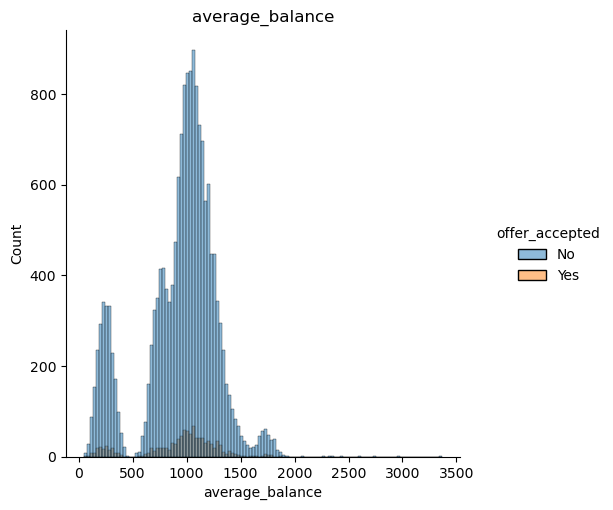

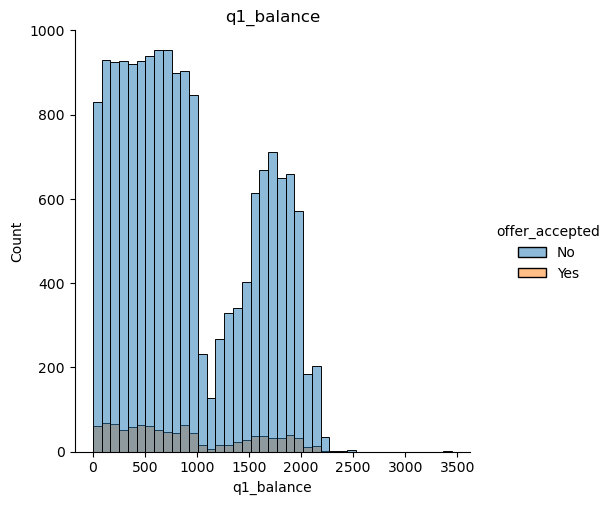

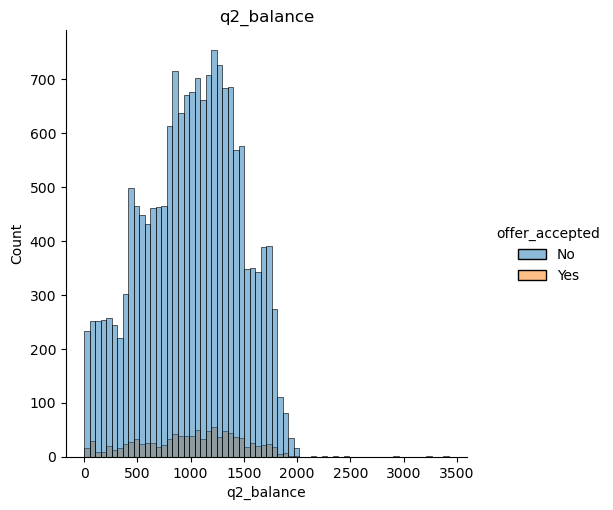

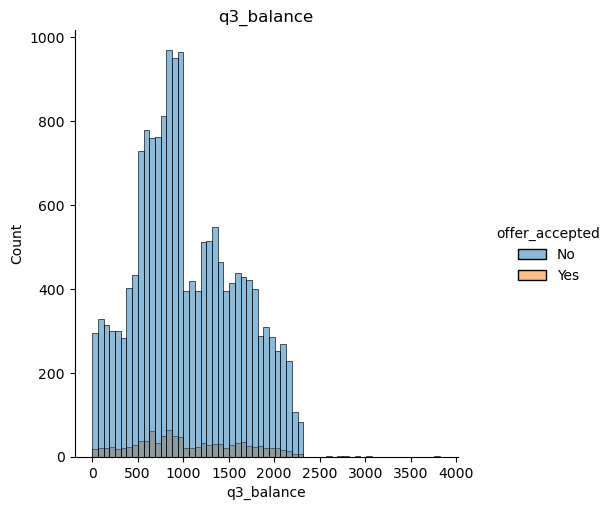

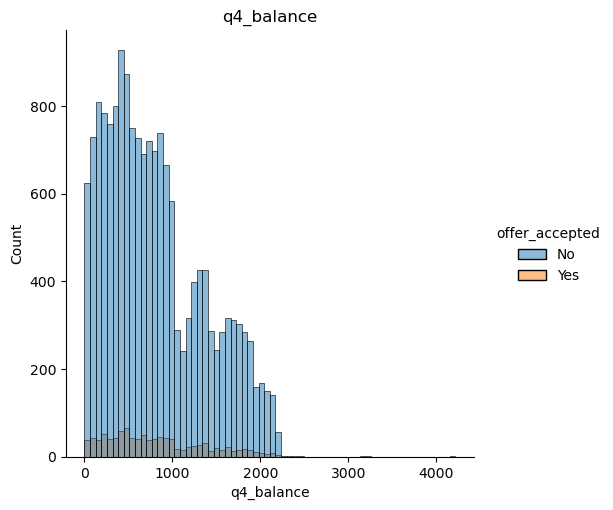

In [58]:

for i in customers.columns:
    if 'balance' in i:
        p= sns.displot(x=customers[i],hue=y)
        p.set(title=i)
        plt.show()


saving file to read with tableau

In [55]:
customers.to_csv('..\data\cleaned\customers_cleaned.csv',index=False)